**<span style="font-size: 20px;">Business Problem</span>**


<span style="font-size: 15px;">Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.</span>

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**<span style="font-size: 15px;">Reading the file</span>**

In [413]:
data = pd.read_csv('netflix.csv')


**<span style="font-size: 15px;">Checking the data</span>**

In [414]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Show_id---Unique ID for every Movie / Tv Show

Type---Identifier - A Movie or TV Show

Title---Title of the Movie / Tv Show

Director---Director of the Movie

Cast---Actors involved in the movie/show

Country---Country where the movie/show was produced

Date_added---Date it was added on Netflix

Release_year---Actual Release year of the movie/show

Rating---TV Rating of the movie/show

Duration---Total Duration - in minutes or number of seasons

Listed_in---Genre

Description---The summary description


--> Info on popularity, revenue, viewer_count are not available. So Analysis is limited to qualitative fields.

**<span style="font-size: 15px;">Analysing basic metrics</span>**

In [415]:
data.shape

(8807, 12)

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**<span style="font-size: 15px;">Column-wise count of null values</span>**

In [417]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**<span style="font-size: 15px;">Replacing null values in columns having large number of null values with 'unknown'</span>**

In [418]:
data[['director','cast','country']] = data[['director','cast','country']].fillna('unknown')

**<span style="font-size: 15px;">Dropping rows of columns with less null values</span>**

In [419]:
data = data.dropna()

In [420]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [421]:
# Convert the 'type' column and 'rating' column to category type
data['type'] = data['type'].astype('category')
data['rating'] = data['rating'].astype('category')

In [422]:
# converting other columns to string dtype
columns_to_convert = ['title','director','cast','country','listed_in','description']
data[columns_to_convert] = data[columns_to_convert].astype('string')

In [424]:
#converting 'date_added' column to datetime dtype
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y')

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1439. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

--> this means there are inconsistenceies in the date format provided in 'date_added' column

--> performing cleaning in 'date_added' column

In [425]:
# stripping extra spaces and converting to title case
data['date_added'] = data['date_added'].str.strip()
data['date_added'] = data['date_added'].str.title()

In [426]:
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y')

In [427]:
# inserting new column 'added_year' after 'date_added' column

added_year = data['date_added'].dt.year
added_year = added_year.astype('int')
data.insert(loc=7, column='added_year', value=added_year)

In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   category      
 2   title         8790 non-null   string        
 3   director      8790 non-null   string        
 4   cast          8790 non-null   string        
 5   country       8790 non-null   string        
 6   date_added    8790 non-null   datetime64[ns]
 7   added_year    8790 non-null   int64         
 8   release_year  8790 non-null   int64         
 9   rating        8790 non-null   category      
 10  duration      8790 non-null   object        
 11  listed_in     8790 non-null   string        
 12  description   8790 non-null   string        
dtypes: category(2), datetime64[ns](1), int64(2), object(2), string(6)
memory usage: 842.0+ KB



**<span style="font-size: 15px;">Renaming columns</span>**



In [429]:
data.rename(columns = {'rating':'content_rating','listed_in':'genre'},inplace=True)

In [303]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,added_year,release_year,content_rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


**<span style="font-size: 15px;">Checking distribution of data</span>**

In [304]:
data.describe().loc[['min', '25%', '50%', '75%', 'max'],['release_year','added_year']]

,release_year,added_year
min,1925.0,2008.0
25%,2013.0,2018.0
50%,2017.0,2019.0
75%,2019.0,2020.0
max,2021.0,2021.0



<span style="font-size: 15px;">--> 25% of the contents were produced between 1925-2013 </span>

<span style="font-size: 15px;">--> 50% of the contents were produced after 2017 </span>

<span style="font-size: 15px;">--> 50% of the contents were streamed after 2019 </span>

**<span style="font-size: 15px;">Top 5 years in terms of contents streamed</span>**

In [305]:
stream_movies_count = data.groupby('added_year')['type'].count()
stream_movies_count.sort_values(ascending= False).iloc[:5]

added_year
2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
Name: type, dtype: int64

Note : *Netflix launched its streaming content service in 2007*

In [306]:
data_on_after_2007 = data[data['release_year']>=2007]
data_on_after_2007.shape

(7833, 13)

--> 7833 contents were launched since Netflix was launched

In [307]:
(data_on_after_2007['release_year'] - data_on_after_2007['added_year']==0).value_counts()

False    4594
True     3239
Name: count, dtype: int64


<span style="font-size: 15px;">--> 3239 out of 7833 contents were streamed in the same year of release</span>

In [308]:
print(f'release_year_range : {data['release_year'].max()- data['release_year'].min()} years')

release_year_range : 96 years


**<span style="font-size: 15px;">checking columns with comma-seperated values</span>**

In [309]:
comma_columns = []

# Iterate through each column
for column in data.columns:
    if data[column].astype(str).str.contains(',').any():
        comma_columns.append(column)

print("Columns with comma-separated values:", comma_columns)

Columns with comma-separated values: ['title', 'director', 'cast', 'country', 'genre', 'description']


--> out of these 'title' and 'description' columns are not considered for analysis

**<span style="font-size: 15px;">Top-3 overall content_ratings</span>**

In [310]:
data['content_rating'].value_counts().iloc[:3]

content_rating
TV-MA    3205
TV-14    2157
TV-PG     861
Name: count, dtype: int64

**<span style="font-size: 15px;">Top-3 movie content_ratings</span>**

In [311]:
data[data['type'] == 'Movie']['content_rating'].value_counts().iloc[:3]

content_rating
TV-MA    2062
TV-14    1427
R         797
Name: count, dtype: int64

**<span style="font-size: 15px;">Top-3 tv show content_ratings</span>**

In [312]:
data[data['type'] == 'TV Show']['content_rating'].value_counts().iloc[:3]

content_rating
TV-MA    1143
TV-14     730
TV-PG     321
Name: count, dtype: int64

**<span style="font-size: 15px;">Analysis on content streamed throughout the year</span>**

In [313]:
type_year_data = data.groupby('added_year')['type'].value_counts().reset_index()

In [314]:
type_year_data.sort_values(by='count').head()

,added_year,type,count
3,2009,TV Show,0
5,2010,TV Show,0
7,2011,TV Show,0
9,2012,TV Show,0
4,2010,Movie,1


In [315]:
movie_year = type_year_data[type_year_data['type']=='Movie']
tvshow_year = type_year_data[type_year_data['type']=='TV Show']

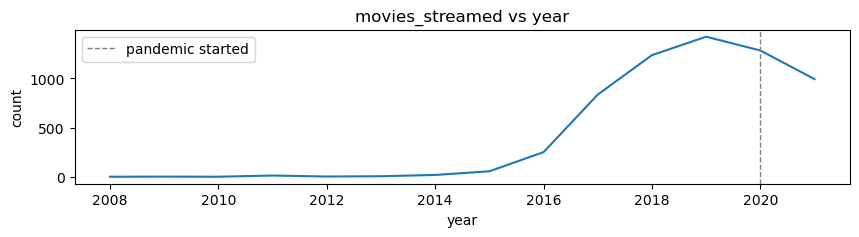

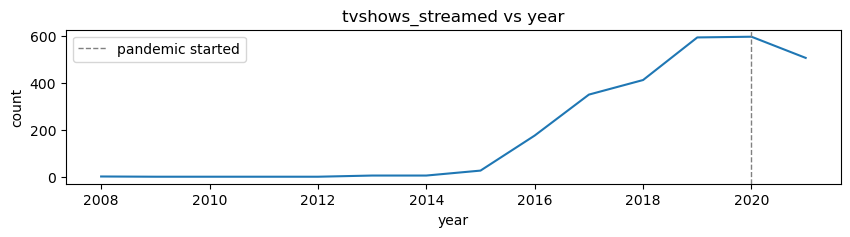

In [316]:
x=movie_year['added_year']
y=movie_year['count']
plt.figure(figsize=(10,2))
plt.xlabel('year')
plt.ylabel('count')
plt.title('movies_streamed vs year')
plt.plot(x,y)

plt.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started')
plt.legend()

x=tvshow_year['added_year']
y=tvshow_year['count']
plt.figure(figsize=(10,2))
plt.xlabel('year')
plt.ylabel('count')
plt.title('tvshows_streamed vs year')
plt.plot(x,y)

plt.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started')
plt.legend()
plt.show()

<span style="font-size: 15px;">--> Notable upsurge in streaming volume (movies and tv shows) after 2015</span>

<span style="font-size: 15px;">--> This may be because of three major reasons - Netflix's international expansion, growth in original content and change in viewing habits </span>

<span style="font-size: 15px;">--> There is a downnward trend for both movie and TV show streaming from 2020 onwards probably due to pandemic </span>

**<span style="font-size: 18px;">Analysis on countries</span>**

In [317]:
comma_columns

['title', 'director', 'cast', 'country', 'genre', 'description']

In [318]:
country_data = data[[comma_columns[3],'added_year','type']]


In [319]:
country_data.loc[155] # for example

country       United Kingdom, United States
added_year                             2021
type                                  Movie
Name: 155, dtype: object

**unnesting 'country' column**

In [320]:
country_data_unnested = country_data.assign(country=country_data['country'].
                                            str.split(',')).explode('country').reset_index(drop=True)

In [321]:
country_data_unnested.loc[155] # after unnesting

country       unknown
added_year       2021
type            Movie
Name: 155, dtype: object

**<span style="font-size: 15px;">Analysing what type of content is present in countries</span>**

*Performing text data cleaning on 'country' column : there are country names with spaces in leading and trailing edges which results in duplicate counting*

In [322]:
country_data_unnested['country'].nunique()

198

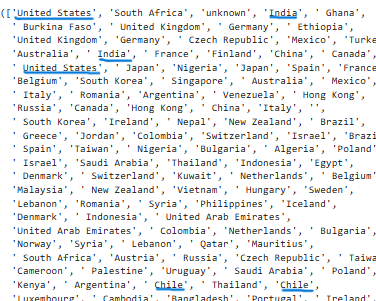

--> *stripping extra spaces and converting to title case*

In [323]:
country_data_unnested['country'] = country_data_unnested['country'].str.strip()
country_data_unnested['country'] = country_data_unnested['country'].str.title()

In [324]:
country_data_unnested['country'].nunique() # after cleaning

124

---> *Netfix has streamed its content in 124 countries till 2021.*

In [325]:
country_summary = country_data_unnested.pivot_table(
                                    index='country',
                                    columns='type',
                                    aggfunc='size',
                                    fill_value=0,
                                    observed = False
                                )

*Movie availability in countries*

In [326]:
country_summary.sort_values(by = 'Movie',ascending=False)['Movie']

country
United States     2749
India              962
United Kingdom     534
Unknown            439
Canada             319
                  ... 
Cuba                 0
Cyprus               0
Azerbaijan           0
Belarus              0
Puerto Rico          0
Name: Movie, Length: 124, dtype: int64

*tv show availability in countries*

In [327]:
country_summary.sort_values(by = 'TV Show',ascending=False)['TV Show']

country
United States     932
Unknown           390
United Kingdom    271
Japan             197
South Korea       170
                 ... 
Uganda              0
Vatican City        0
Venezuela           0
Vietnam             0
Zimbabwe            0
Name: TV Show, Length: 124, dtype: int64

**<span style="font-size: 15px;">Region-wise analysis on Major Asian countries</span>**

In [328]:
east_asia = ['China', 'Japan', 'North Korea', 'South Korea', 'Mongolia']
south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

**<span style="font-size: 13px;">East Asia</span>**

In [329]:
east_asia_country = country_data_unnested[country_data_unnested['country'].isin(east_asia)]

In [330]:
east_asia_country.head(2)

,country,added_year,type
46,China,2021,Movie
58,Japan,2021,Movie


In [331]:
east_asia_country.groupby('added_year')['country'].count()

added_year
2015      2
2016     48
2017    105
2018    119
2019    173
2020    161
2021    102
Name: country, dtype: int64

In [332]:
east_asia_country_summary = east_asia_country.pivot_table(
                                    index='added_year',
                                    columns='country',
                                    aggfunc='size',
                                    fill_value=0
                                )

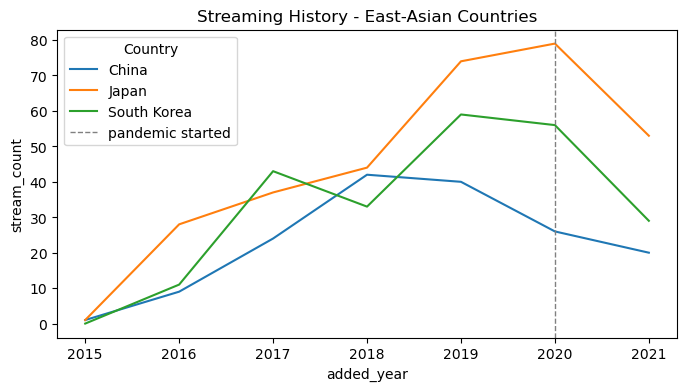

In [333]:
# North Korea and Mongolia not in analysis
ax=east_asia_country_summary[['China','Japan','South Korea']].plot(
                                                                ylabel= 'stream_count',
                                                                kind='line',
                                                                figsize=(8, 4),
                                                                title = 'Streaming History - East-Asian Countries')
ax.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started'
)  
ax.legend(loc='upper left', title='Country')
plt.show()

--> Netfilx's penetration in south-east asian countries started in 2015 in a gradual manner due to a combination of market-readiness factors, stiff local competition, and the complex process of content localization. Unlike regions with fewer existing streaming options, many East Asian countries already had established systems for content consumption. 

--> Countries like South Korea had some of the world's fastest internet speeds, meaning high-quality streaming was technically feasible but also that consumers had high expectations. Local telecom and media companies already operated their own streaming and IPTV services.

--> Netflix needed to learn and adapt to local preferences rather than simply exporting its existing Western catalog.

--> Netflix streaming in China slowed down after 2018 due to factors like intensified government censorship and regulation of online content, economic pressures and industry consolidation. A shift in streaming strategy through focusing on selectively licensing its original content to Chinese partners, focusing on the global Mandarin-speaking audience etc can help to penetrate in this 'great firewall' in future.


In [343]:
east_asia_country['Movie'] = (east_asia_country['type']=='Movie')
east_asia_country['TV Show'] = (east_asia_country['type']=='TV Show')

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2217585014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_asia_country['Movie'] = (east_asia_country['type']=='Movie')
C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2217585014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_asia_country['TV Show'] = (east_asia_country['type']=='TV Show')


In [344]:
summary_df = east_asia_country.groupby('country').agg({'Movie': 'sum', 'TV Show': 'sum'})


In [345]:
summary_df

,Movie,TV Show
country,,
China,114,48
Japan,119,197
Mongolia,1,0
South Korea,61,170


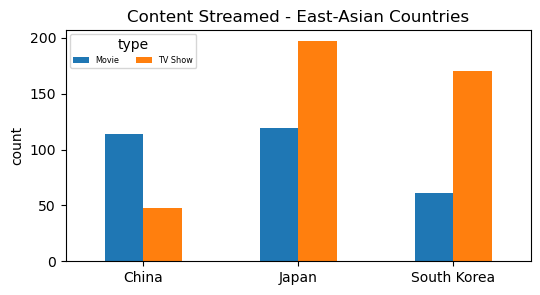

In [88]:
ax=summary_df.loc[['China','Japan','South Korea'],['Movie','TV Show']].plot(
                                                                            ylabel= 'count',
                                                                            kind='bar',
                                                                            figsize=(6, 3),
                                                                            title = 'Content Streamed - East-Asian Countries',rot=0)

ax.legend(loc='upper left', title='type',ncols=2,fontsize='xx-small')
ax.set_xlabel('')
plt.show()

--> Japan and South Korea prefer TV Shows to Movies because of many local factors - High-quality local dramas,"Comfort viewing", Universal appeal etc. 

--> Movie streaming in South Korean market focused on high-quality content, strategic marketing, and catering to local viewing habits can reap benefits in future.

--> Due to its strict govt rules, China has low figures.

**South Asia**

In [89]:
south_asia_country = country_data_unnested[country_data_unnested['country'].isin(south_asia)]

In [90]:
south_asia_country['country'].unique()

array(['India', 'Nepal', 'Bangladesh', 'Pakistan', 'Sri Lanka',
       'Afghanistan'], dtype=object)

In [91]:
south_asia_country_summary = south_asia_country.pivot_table(
                                    index='added_year',
                                    columns='country',
                                    aggfunc='size',
                                    fill_value=0
                                )

In [92]:
south_asia_country_summary.head()

country,Afghanistan,Bangladesh,India,Nepal,Pakistan,Sri Lanka
added_year,,,,,,
2016,0,0,13,0,4,0
2017,1,0,162,1,5,1
2018,0,1,349,0,5,0
2019,0,2,218,0,9,0
2020,0,0,199,0,1,0


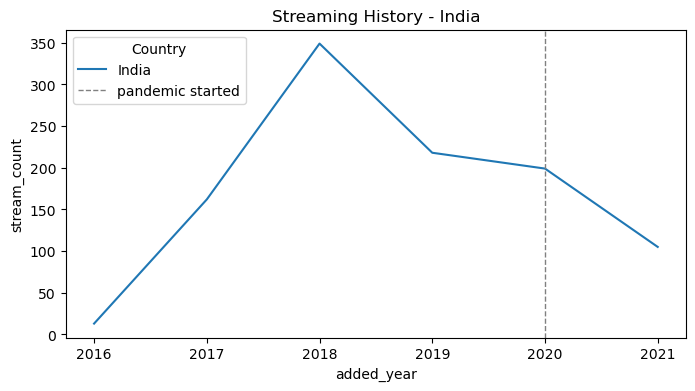

In [93]:
ax=south_asia_country_summary[['India']].plot(
                                                                ylabel= 'stream_count',
                                                                kind='line',
                                                                figsize=(8, 4),
                                                                title = 'Streaming History - India')
ax.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started'
)  
ax.legend(loc='upper left', title='Country')
plt.show()

--> Sudden drop in streaming after 2018 can be attributed to stiff competition from rival players like Disney+Hotstar, Amazon Prime Video and Local and free-to-use platforms

In [94]:
south_asia_country['Movie'] = (south_asia_country['type'] == 'Movie')
south_asia_country['TV Show'] = (south_asia_country['type'] == 'TV Show')

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2564854388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_country['Movie'] = (south_asia_country['type'] == 'Movie')
C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2564854388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_country['TV Show'] = (south_asia_country['type'] == 'TV Show')


In [95]:
summary_df = south_asia_country.groupby('country').agg({'Movie': 'sum', 'TV Show': 'sum'})

In [96]:
summary_df

,Movie,TV Show
country,,
Afghanistan,1,0
Bangladesh,4,0
India,962,84
Nepal,2,0
Pakistan,20,4
Sri Lanka,1,0


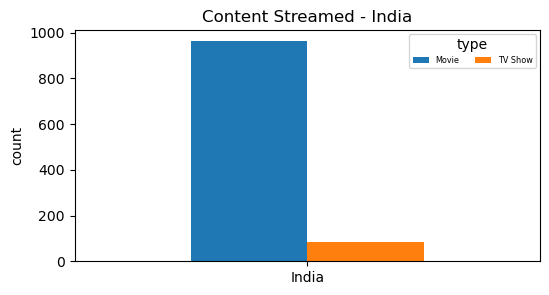

In [97]:
ax=summary_df.loc[['India'],['Movie','TV Show']].plot(
                                                    ylabel= 'count',
                                                    kind='bar',
                                                    figsize=(6, 3),
                                                    title = 'Content Streamed - India',rot=0)

ax.legend(loc='upper right', title='type',ncols=2,fontsize='xx-small')
ax.set_xlabel('')
plt.show()

--> In Indian market, TV Shows streaming are very less comapred to Movies due to a combination of intense price competition, a strong preference for regional content, and a strategic misalignment with Indian viewing habits.

-->India is a culturally and linguistically diverse country, and local platforms like Disney+ Hotstar and ZEE5 invest heavily in content across numerous regional languages.

--> A significant portion of the Indian audience prefers free or ad-supported content. Competitors like JioCinema have capitalized on this by offering premium content and live sports for free, monetizing through advertising. 

-->  Some of Netflix's early Indian originals were criticized for their Westernized style and themes that failed to resonate with a broad Indian audience.

--> A renewed emphasis on hyper-localization to capture the mass market, combined with an ongoing commitment to its premium positioning for urban and affluent audiences

**<span style="font-size: 15px;">Analysis on Major European countries</span>**

In [98]:
european_countries = [
    # Western Europe
    'Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg', 'Monaco',
    'Netherlands', 'Switzerland',
    # Northern Europe
    'Denmark', 'Estonia', 'Finland', 'Iceland', 'Ireland', 'Latvia', 'Lithuania',
    'Norway', 'Sweden', 'United Kingdom',
    # Southern Europe
    'Albania', 'Andorra', 'Bosnia and Herzegovina', 'Croatia', 'Cyprus', 'Greece',
    'Italy', 'Kosovo', 'Malta', 'Montenegro', 'North Macedonia', 'Portugal',
    'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Vatican City',
    # Eastern Europe
    'Belarus', 'Bulgaria', 'Czechia', 'Hungary', 'Moldova', 'Poland', 'Romania',
    'Russia', 'Slovakia', 'Ukraine',
    # Transcontinental Countries (mostly in Asia, politically and culturally part of Europe)
    'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Turkey'
]

In [99]:
len(european_countries)

51

In [100]:
# checking the country list with netflix data
european_country = country_data_unnested[country_data_unnested['country'].isin(european_countries)]

In [101]:
european_country['country'].nunique()

42

--> *Netflix has presence in 42 european countries as of 2021.*

In [102]:
europe_summary = european_country.pivot_table(
                                    index='added_year',
                                    columns='country',
                                    aggfunc='size',
                                    fill_value=0
                                )

In [103]:
europe_summary[['France','United Kingdom','Spain','Turkey','Germany','Italy','Belgium']].head(11)

country,France,United Kingdom,Spain,Turkey,Germany,Italy,Belgium
added_year,,,,,,,
2009,0,0,0,0,0,0,0
2011,2,1,1,0,0,0,0
2013,0,1,0,0,0,0,0
2014,0,3,0,0,0,0,0
2015,9,8,0,0,2,3,3
2016,29,54,17,4,14,2,4
2017,53,134,42,30,33,16,19
2018,64,147,43,6,34,14,14
2019,79,191,53,19,45,20,20


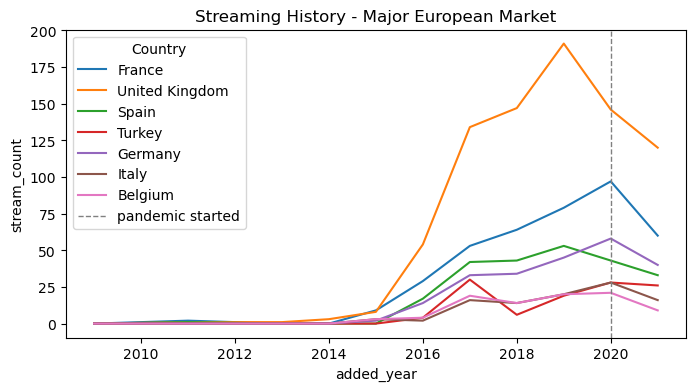

In [104]:
ax=europe_summary[['France','United Kingdom','Spain','Turkey','Germany','Italy','Belgium']].plot(
                                                                ylabel= 'stream_count',
                                                                kind='line',
                                                                figsize=(8, 4),
                                                                title = 'Streaming History - Major European Market')
ax.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started'
)  
ax.legend(loc='upper left', title='Country')
plt.show()

--> Clearly, Netfilx has a stronger base in United Kingdom compared to other countries.

In [105]:
european_country['Movie'] = (european_country['type'] == 'Movie')
european_country['TV Show'] = (european_country['type'] == 'TV Show')

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2563302752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_country['Movie'] = (european_country['type'] == 'Movie')
C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2563302752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_country['TV Show'] = (european_country['type'] == 'TV Show')


In [106]:
summary_df =european_country.groupby('country').agg({'Movie': 'sum', 'TV Show': 'sum'})

In [107]:
summary_df.sort_values(by='Movie',ascending=False).head()

,Movie,TV Show
country,,
United Kingdom,534,271
France,303,90
Germany,182,44
Spain,171,61
Turkey,83,30


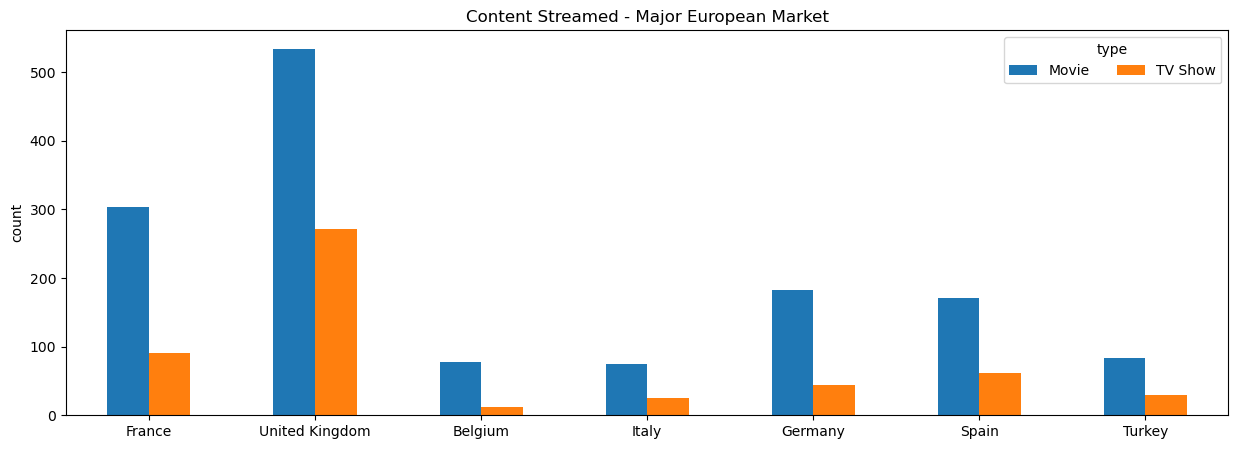

In [108]:
ax=summary_df.loc[['France','United Kingdom','Belgium', 'Italy','Germany','Spain','Turkey'],['Movie','TV Show']].plot(
                                                    ylabel= 'count',
                                                    kind='bar',
                                                    figsize=(15, 5),
                                                    title = 'Content Streamed - Major European Market',rot = 0)

ax.legend(loc='upper right', title='type',ncols=2,fontsize='medium')
ax.set_xlabel('')
plt.show()

--> Clearly United Kingdom stand out in Movies and TV Shows.

--> Out of 51 countries, netflix has presence in 41 countries out of which only 7 countries are major contributors, which is a food for thought. 

--> Shift in strategy required to penetrate into other parts of europe which are linguistically and culturally diverse in addition to presence of strong local players. 

**<span style="font-size: 15px;">Analysis on Major African Countries (in terms of subscription data taken from google)</span>**

In [109]:
africa = ['Egypt', 'Nigeria','South Africa']

In [110]:
african_country = country_data_unnested[country_data_unnested['country'].isin(africa)]

In [111]:
african_country['country'].unique()

array(['South Africa', 'Nigeria', 'Egypt'], dtype=object)

In [112]:
africa_summary = african_country.pivot_table(
                                    index='added_year',
                                    columns='country',
                                    aggfunc='size',
                                    fill_value=0
                                )

In [113]:
africa_summary

country,Egypt,Nigeria,South Africa
added_year,,,
2014,1,0,0
2015,0,1,0
2016,0,1,2
2017,0,1,5
2018,3,1,13
2019,54,29,9
2020,52,42,24
2021,7,28,9


In [114]:
african_country['Movie'] = (african_country['type'] == 'Movie')
african_country['TV Show'] = (african_country['type'] == 'TV Show')

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\642608235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  african_country['Movie'] = (african_country['type'] == 'Movie')
C:\Users\dell\AppData\Local\Temp\ipykernel_12168\642608235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  african_country['TV Show'] = (african_country['type'] == 'TV Show')


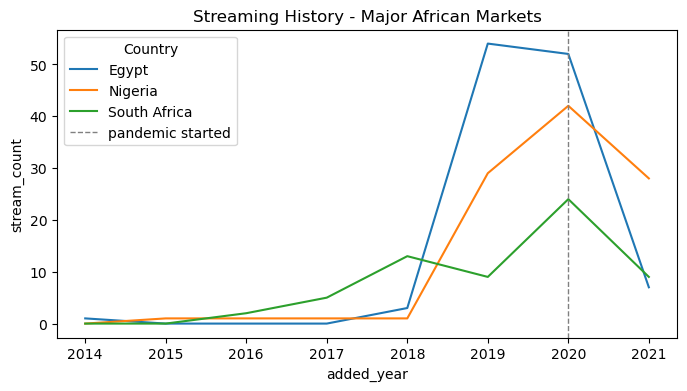

In [115]:
ax=africa_summary[['Egypt','Nigeria','South Africa']].plot(
                                                                ylabel= 'stream_count',
                                                                kind='line',
                                                                figsize=(8, 4),
                                                                title = 'Streaming History - Major African Markets')
ax.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started'
)  
ax.legend(loc='upper left', title='Country')
plt.show()

In [116]:
summary_df =african_country.groupby('country').agg({'Movie': 'sum', 'TV Show': 'sum'})

In [117]:
summary_df

,Movie,TV Show
country,,
Egypt,102,15
Nigeria,94,9
South Africa,51,11


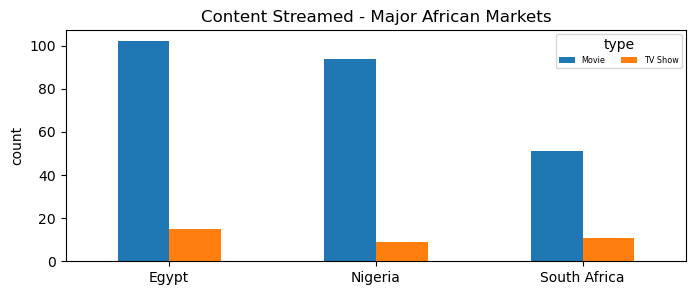

In [118]:
ax=summary_df.loc[['Egypt','Nigeria','South Africa'],['Movie','TV Show']].plot(
                                                    ylabel= 'count',
                                                    kind='bar',
                                                    figsize=(8, 3),
                                                    title = 'Content Streamed - Major African Markets',rot = 0)

ax.legend(loc='upper right', title='type',ncols=2,fontsize='xx-small')
ax.set_xlabel('')
plt.show()

--> Data-heavy format of high-definition TV shows requires significant amounts of data, which is unaffordable for many, that could be a reason many african countries have a lower preference for TV shows.

--> A more tailored approach prioritising local stories, investing in original content, offline viewing options and adjusted pricing models can increase subsription rate to some extent.

**<span style="font-size: 15px;">Analysis on Major North American Countries (in terms of subscription)</span>**

In [119]:
north_america=['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 
                'Bermuda', 'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands', 'Canada', 
                'Cayman Islands', 'Clipperton Island', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic', 
                'El Salvador', 'Greenland', 'Grenada', 'Guadeloupe', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique',
                'Mexico', 'Montserrat', 'Navassa Island', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Barthélemy', 'Saint Kitts and Nevis',
                'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Sint Maarten (Dutch part)',
                'Trinidad and Tobago', 'Turks and Caicos Islands', 'United States', 'United States Virgin Islands']

In [123]:
len(north_america)

43

In [124]:
north_america_country =country_data_unnested[country_data_unnested['country'].isin(north_america)]

In [149]:
north_america_country.head(2)

,country,added_year,type,Movie,TV Show
0,United States,2021,Movie,True,False
7,United States,2021,Movie,True,False


In [127]:
north_america_country['country'].unique()

array(['United States', 'Mexico', 'Canada', 'Cayman Islands',
       'Puerto Rico', 'Guatemala', 'Bermuda', 'Bahamas', 'Cuba',
       'Nicaragua', 'Dominican Republic', 'Jamaica', 'Panama'],
      dtype=object)

In [128]:
north_american_summary = north_america_country.pivot_table(
                                    index='added_year',
                                    columns='country',
                                    aggfunc='size',
                                    fill_value=0
                                )

In [129]:
north_america_country['Movie'] = (north_america_country['type'] == 'Movie')
north_america_country['TV Show'] = (north_america_country['type'] == 'TV Show')

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2214214642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_country['Movie'] = (north_america_country['type'] == 'Movie')
C:\Users\dell\AppData\Local\Temp\ipykernel_12168\2214214642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_country['TV Show'] = (north_america_country['type'] == 'TV Show')


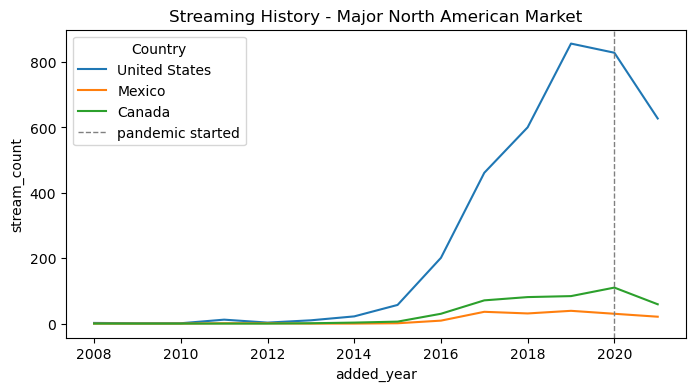

In [130]:
ax=north_american_summary[['United States','Mexico','Canada']].plot(
                                                                ylabel= 'stream_count',
                                                                kind='line',
                                                                figsize=(8, 4),
                                                                title = 'Streaming History - Major North American Market')
ax.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started'
)  
ax.legend(loc='upper left', title='Country')
plt.show()

In [131]:
summary_df =north_america_country.groupby('country').agg({'Movie': 'sum', 'TV Show': 'sum'})

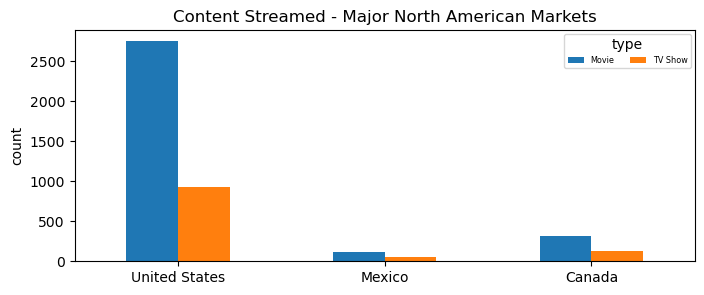

In [133]:
ax=summary_df.loc[['United States','Mexico','Canada'],['Movie','TV Show']].plot(
                                                    ylabel= 'count',
                                                    kind='bar',
                                                    figsize=(8, 3),
                                                    title = 'Content Streamed - Major North American Markets',rot = 0)

ax.legend(loc='upper right', title='type',ncols=2,fontsize='xx-small')
ax.set_xlabel('')
plt.show()

--> Home market advantage, vast content library, strong brand recognition placed US the most profitable amrket of Netflix.

--> Very low streaming in Canada reflects the typical trajectory of a mature market, which differs from emerging markets that offer higher growth potential.

**<span style="font-size: 15px;">Analysis on Major South American Countries (in terms of subscription)</span>**

In [134]:
south_america= ['Argentina', 'Aruba', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
                'Ecuador', 'Falkland Islands (Malvinas)', 'French Guiana', 'Guyana', 
                'Paraguay', 'Peru', 'South Georgia and South Sandwich Islands', 'Suriname', 'Uruguay', 'Venezuela']

In [135]:
south_america_country =country_data_unnested[country_data_unnested['country'].isin(south_america)]

In [136]:
south_america_country['country'].unique()

array(['Argentina', 'Venezuela', 'Brazil', 'Colombia', 'Uruguay', 'Chile',
       'Peru', 'Paraguay', 'Ecuador'], dtype=object)

In [137]:
south_american_summary = south_america_country.pivot_table(
                                    index='added_year',
                                    columns='country',
                                    aggfunc='size',
                                    fill_value=0
                                )

In [138]:
south_american_summary 

country,Argentina,Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
added_year,,,,,,,,,
2014,0,0,0,0,1,0,0,0,0
2016,3,2,2,2,0,0,3,0,0
2017,16,16,8,4,0,0,1,4,2
2018,26,19,9,15,0,0,3,1,1
2019,18,22,3,12,0,1,2,4,0
2020,16,27,5,10,0,0,1,3,0
2021,12,11,2,9,0,0,0,2,1


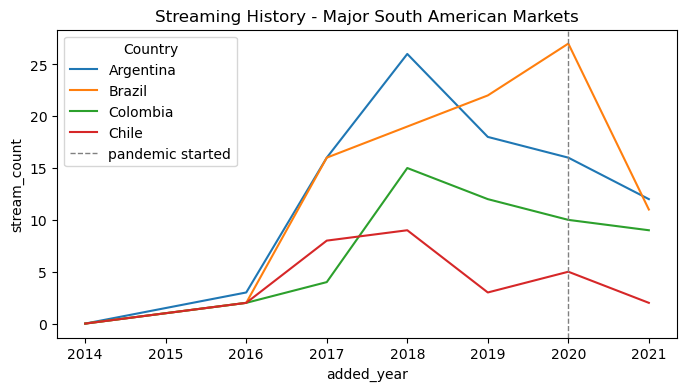

In [139]:
ax=south_american_summary[['Argentina','Brazil','Colombia','Chile']].plot(
                                                                ylabel= 'stream_count',
                                                                kind='line',
                                                                figsize=(8, 4),
                                                                title = 'Streaming History - Major South American Markets')
ax.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='pandemic started'
)  
ax.legend(loc='upper left', title='Country')
plt.show()

In [140]:
south_america_country['Movie'] = (south_america_country['type'] == 'Movie')
south_america_country['TV Show'] = (south_america_country['type'] == 'TV Show')

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\419120570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_america_country['Movie'] = (south_america_country['type'] == 'Movie')
C:\Users\dell\AppData\Local\Temp\ipykernel_12168\419120570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_america_country['TV Show'] = (south_america_country['type'] == 'TV Show')


In [141]:
summary_df =south_america_country.groupby('country').agg({'Movie': 'sum', 'TV Show': 'sum'})

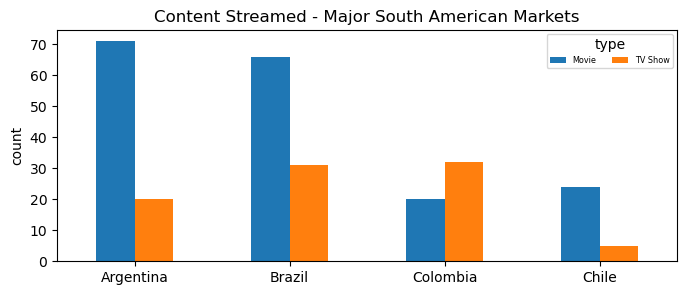

In [142]:
ax=summary_df.loc[['Argentina','Brazil','Colombia','Chile'],['Movie','TV Show']].plot(
                                                    ylabel= 'count',
                                                    kind='bar',
                                                    figsize=(8, 3),
                                                    title = 'Content Streamed - Major South American Markets',rot = 0)

ax.legend(loc='upper right', title='type',ncols=2,fontsize='xx-small')
ax.set_xlabel('')
plt.show()

**<span style="font-size: 15px;">Australia</span>**

In [144]:
australia_data = country_data_unnested[country_data_unnested['country'].isin(['Australia'])]

In [150]:
australia_data.head(2)

,country,added_year,type
31,Australia,2021,TV Show
124,Australia,2021,TV Show


In [151]:
australia_summary = australia_data.pivot_table(
                                    index='added_year',
                                    columns='country',
                                    aggfunc='size',
                                    fill_value=0
                                )

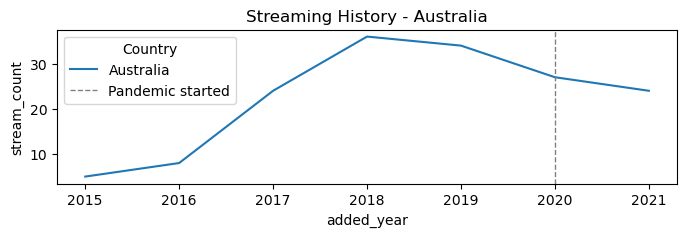

In [153]:
ax=australia_summary['Australia'].plot(
                                        ylabel= 'stream_count',
                                        kind='line',
                                        figsize=(8, 2),
                                        title = 'Streaming History - Australia')
ax.axvline(
    x=2020,
    color='grey',
    linestyle='--',
    linewidth=1,
    label='Pandemic started'
)  
ax.legend(loc='upper left', title='Country')
plt.show()

In [154]:
australia_data['Movie'] = (australia_data['type'] == 'Movie')
australia_data['TV Show'] = (australia_data['type'] == 'TV Show')

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\35917476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  australia_data['Movie'] = (australia_data['type'] == 'Movie')
C:\Users\dell\AppData\Local\Temp\ipykernel_12168\35917476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  australia_data['TV Show'] = (australia_data['type'] == 'TV Show')


In [155]:
summary_df =australia_data.groupby('country').agg({'Movie': 'sum', 'TV Show': 'sum'})

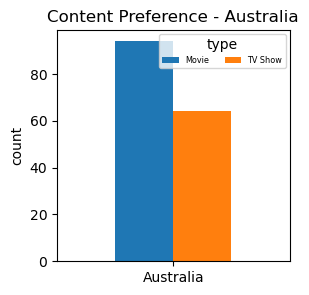

In [156]:
ax=summary_df.loc[['Australia'],['Movie','TV Show']].plot(
                                                    ylabel= 'count',
                                                    kind='bar',
                                                    figsize=(3, 3),
                                                    title = 'Content Preference - Australia',rot = 0)

ax.legend(loc='upper right', title='type',ncols=2,fontsize='xx-small')
ax.set_xlabel('')
plt.show()

--> though Australia has good movie and tvshow streaming records, low figures are due to extremely competitive, saturated, and price-sensitive market. 

**<span style="font-size: 20px;">Content Streaming Strategy throughout the years</span>**

In [157]:
content_data = data.pivot_table(
                                    index='added_year',
                                    columns='type',
                                    aggfunc='size',
                                    fill_value=0
                                )

C:\Users\dell\AppData\Local\Temp\ipykernel_12168\3764575800.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  content_data = data.pivot_table(


In [158]:
content_data.head()

type,Movie,TV Show
added_year,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0


In [159]:
content_data.groupby(by='added_year').agg({'Movie':'sum','TV Show':'sum'})

type,Movie,TV Show
added_year,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0
2013,6,5
2014,19,5
2015,56,26
2016,251,175


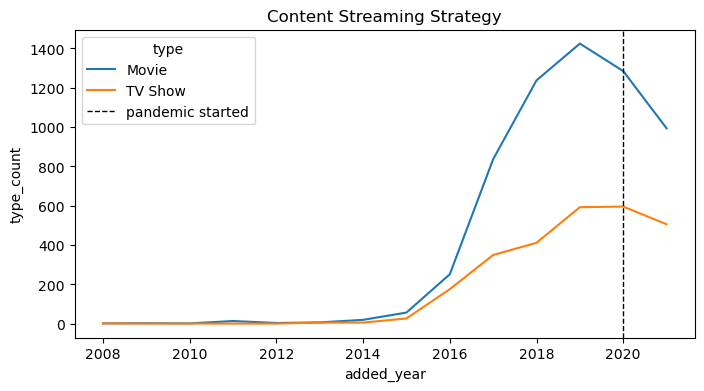

In [160]:
ax=content_data[['Movie','TV Show']].plot(
                                            ylabel= 'type_count',
                                            kind='line',
                                            figsize=(8, 4),
                                            title = 'Content Streaming Strategy')
ax.axvline(
    x=2020,
    color='black',
    linestyle='--',
    linewidth=1,
    label='pandemic started'
)  
ax.legend(loc='upper left', title='type')
# plt.grid()
plt.show()

--> In 2016, Netflix expanded its service to 130 new countries, including many in Africa and Asia, achieving a near-universal global presence. So
the surge in streaming can be attributed to this.

--> In 2015, Netflix significantly increased its investment in creating original films and television series drawing global audiences and securing licences.

**<span style="font-size: 20px;">Role of genre in content Startegy</span>**

In [172]:
comma_columns

['title', 'director', 'cast', 'country', 'genre', 'description']

In [173]:
genre_country_data = data[[comma_columns[4],'country']]

**Unnesting 'genre' column**

In [174]:
genre_country_data = genre_country_data.assign(
                                        genre=genre_country_data['genre'].str.split(',')).explode('genre').reset_index(drop=True)

In [175]:
genre_country_data.shape

(19323, 2)

*Performing text data cleaning on 'genre' column*

In [176]:
genre_country_data['genre'] = genre_country_data['genre'].str.strip()
genre_country_data['genre'] = genre_country_data['genre'].str.title()

In [177]:
genre_country_data.head()

,genre,country
0,Documentaries,United States
1,International Tv Shows,South Africa
2,Tv Dramas,South Africa
3,Tv Mysteries,South Africa
4,Crime Tv Shows,NaN


In [178]:
print(f' There are {genre_country_data['genre'].nunique()} unique genres in the dataset')

 There are 42 unique genres in the dataset


In [179]:
genre_counts = genre_country_data['genre'].value_counts()
genre_counts.head(5)

genre
International Movies      2752
Dramas                    2427
Comedies                  1674
International Tv Shows    1351
Documentaries              869
Name: count, dtype: int64

--> Genre - 'International Movies' tops the list

**Segregating top_5 genres from 'others'**

In [180]:
top_n = 5
top_genres = genre_counts.head(top_n)
other_genres_count = genre_counts.iloc[top_n:].sum()

In [181]:
plot_data = pd.concat([top_genres, pd.Series([other_genres_count], index=['Other'])])
plot_data

International Movies       2752
Dramas                     2427
Comedies                   1674
International Tv Shows     1351
Documentaries               869
Other                     10250
dtype: int64

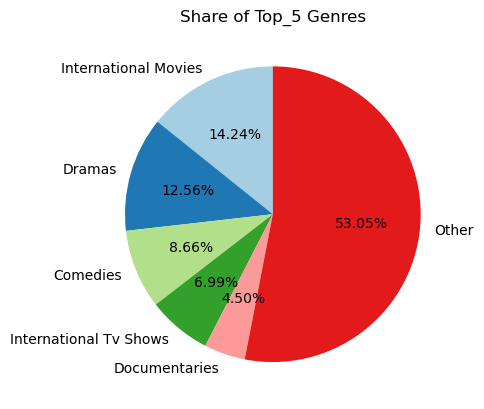

In [182]:
plt.pie(plot_data.values,
       labels=plot_data.index,
       startangle=90,
        colors=plt.cm.Paired(np.arange(len(plot_data))),
       autopct = '%.2f%%' #
        ) # label the wedges with their numeric value
plt.title("Share of Top_5 Genres")
plt.show()

--> International Movies with 14.26% is the top genre followed by Dramas and Comedies

--> These 5 genres account for nearly 50% of all content streamed worldwide.

**Top-3 preferred genres in major countries of each region**

In [183]:
top_n = 11
top_countries = country_data_unnested['country'].value_counts().head(top_n)
other_countries_count = country_data_unnested['country'].value_counts().iloc[top_n:].sum()

In [184]:
plot_data = pd.concat([top_countries, pd.Series([other_countries_count], index=['Other'])])
plot_data

United States     3681
India             1046
Unknown            829
United Kingdom     805
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
Other             2460
dtype: int64

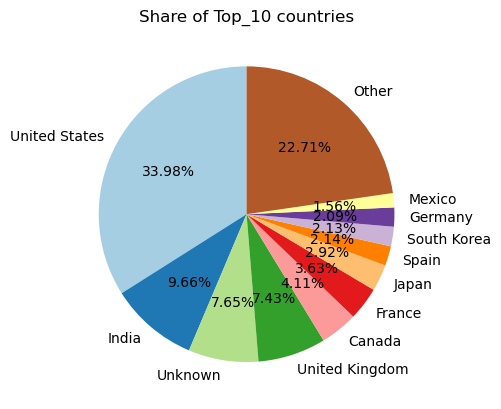

In [185]:
plt.pie(plot_data.values,
       labels=plot_data.index,
       startangle=90,
        colors=plt.cm.Paired(np.arange(len(plot_data))),
       autopct = '%.2f%%' #
        ) # label the wedges with their numeric value
plt.title("Share of Top_10 countries")
plt.show()

--> 70% of the contents are streamed in these 10 countries (excluding unknown)

**<span style="font-size: 15px;">Top_5 Genres of Top_3 Countries (in terms of streaming)</span>**

##### Top_5 genres of United States

In [186]:
us_data = genre_country_data[genre_country_data['country'] == 'United States']

# Group by genre and count the occurrences
us_genre_counts = us_data.groupby('genre').size().sort_values(ascending=False)

In [346]:
US = us_genre_counts.iloc[:5]

In [188]:
india_data = genre_country_data[genre_country_data['country'] == 'India']

# Group by genre and count the occurrences
india_genre_counts = india_data.groupby('genre').size().sort_values(ascending=False)

In [347]:
INDIA = india_genre_counts.iloc[:5]

In [190]:
uk_data = genre_country_data[genre_country_data['country'] == 'United Kingdom']

# Group by genre and count the occurrences
uk_genre_counts = uk_data.groupby('genre').size().sort_values(ascending=False)

In [348]:
UK = uk_genre_counts.iloc[:5]

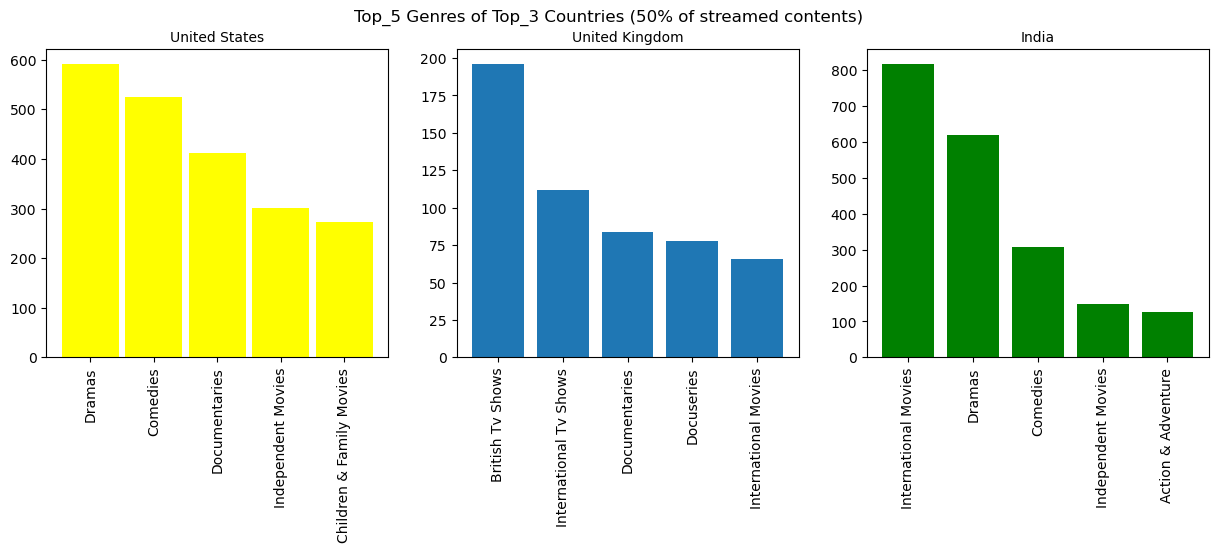

In [192]:
plt.figure(figsize=(15,4))
plt.suptitle('Top_5 Genres of Top_3 Countries (50% of streamed contents)',fontsize=12)

plt.subplot(1,3,1)
plt.bar(x=US.index, height = US.values,data =US,color = 'yellow',width=0.9 )
plt.title('United States',fontsize=10)
plt.xticks(rotation=90, fontsize = 10)

plt.subplot(1,3,2)
plt.bar(x=UK.index, height = UK.values,data =UK, width=0.8 )
plt.title('United Kingdom',fontsize=10)
plt.xticks(rotation=90, fontsize = 10)

plt.subplot(1,3,3)
plt.bar(x=INDIA.index, height = INDIA.values,data =INDIA,color = 'green',width=0.8 )
plt.title('India',fontsize=10)
plt.xticks(rotation=90, fontsize = 10)


plt.show()

--> Clearly for US and India Netflix streamed 'Movie' largely while for United Kingdom it is obvious that preference is given to 'TV Show'.

--> Netflix streamed 50% of its total contents in these three countries as of 2021.

**<span style="font-size: 15px;">Analysis on 'director' column</span>**

In [193]:
comma_columns

['title', 'director', 'cast', 'country', 'genre', 'description']

*unnesting 'director' column*

In [201]:
director_data_unnested = data.assign(director=data['director'].str.split(',')).explode('director').reset_index(drop=True)

In [202]:
director_data_unnested.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [203]:
# filtering 'unknown' names
dir_data = director_data_unnested.loc[director_data_unnested['director']!='unknown']

In [204]:
dir_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [415]:
# pip install pandas wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [205]:
from wordcloud import WordCloud

In [349]:
dir_name_freq = pd.Series(dir_data['director'])
word_frequencies = dict(dir_name_freq.value_counts())

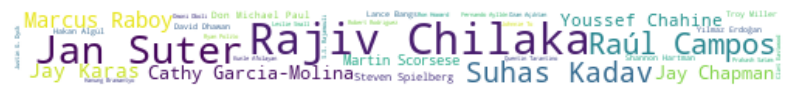

In [350]:
wordcloud_freq = WordCloud(
    width=500,
    height=50,
    background_color='white'
).generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_freq, interpolation='bilinear')
plt.axis("off")
plt.show()

In [209]:
dir_name_freq.value_counts().head()

director
Rajiv Chilaka    22
 Jan Suter       18
Raúl Campos      18
Suhas Kadav      16
Marcus Raboy     16
Name: count, dtype: int64

--> Rajiv Chakala - creator of the popular Indian cartoon characters Chhota Bheem and Mighty Little Bheem

--> Jan Suter - stand-up comedy

--> Raúl Campos - directed numerous comedy specials 

--> Marcus Raboy - stand-up comedy

--> Suhas Kadav - associated with some of India's most successful animated series and films - Motu Patlu: King of Kings, Motu Patlu: Kung Fu Kings


**<span style="font-size: 15px;">Analysis on 'cast' column</span>**

In [351]:
comma_columns

['title', 'director', 'cast', 'country', 'genre', 'description']

*unnesting 'cast' column*

In [211]:
data['cast'].head(2)

0                                              unknown
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
Name: cast, dtype: object

In [212]:
cast_data_unnested = data.assign(cast=data['cast'].str.split(',')).explode('cast').reset_index(drop=True)

In [214]:
cast_data_unnested['cast'].head(3)

0         unknown
1      Ama Qamata
2     Khosi Ngema
Name: cast, dtype: object

In [352]:
# filtering 'unknown' names
cast_data = cast_data_unnested.loc[cast_data_unnested['cast']!='unknown']

In [353]:
cast_name_freq = pd.Series(cast_data['cast'])
word_frequencies = dict(cast_name_freq.value_counts())

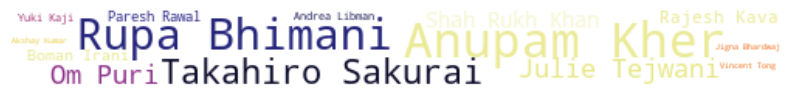

In [354]:
wordcloud_freq = WordCloud(
    width=500,
    height=50,
    background_color='white',
    colormap = 'CMRmap'
).generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_freq, interpolation='bilinear')
plt.axis("off")
plt.show()

--> Anupam Kher - Indian Actor

--> Takahiro Sakurai - Japanese Actor

--> Julie Tejwani - Indian Actress famous for being the voice of the popular animated character Raju

--> Rupa Bhimani - Indian Actress, dubbed for shinchan

**<span style="font-size: 20px;">Analysis on duration of content</span>**

In [355]:
type_dur_data = data.loc[:,['type','duration']]

In [356]:
type_dur_data.head(2)

,type,duration
0,Movie,90 min
1,TV Show,2 Seasons


In [357]:
# storing movie and tv show data in seperate variables
type_dur_data_tvshow = type_dur_data[type_dur_data['duration'].str.contains('Season')]
type_dur_data_movie = type_dur_data[type_dur_data['duration'].str.contains('min')]

**<span style="font-size: 15px;">Analysis on movie duration</span>**

In [358]:
# splitting digits and str
time_split = type_dur_data_movie['duration'].str.split(" ")

In [359]:
time_split[:2]

0    [90, min]
6    [91, min]
Name: duration, dtype: object

In [360]:
time_split=list(time_split)

In [361]:
time_split[:5]

[['90', 'min'], ['91', 'min'], ['125', 'min'], ['104', 'min'], ['127', 'min']]

In [362]:
# extracting digits from string
time=[]
for i in time_split:
    for j in i:
        time.append(int(j))
        break

In [363]:
time[:5]

[90, 91, 125, 104, 127]

In [365]:
print(max(time),min(time),sep=",") # checking max and min duration of movie type

312,3


In [366]:
data[data['duration']=='3 min']

,show_id,type,title,director,cast,country,date_added,added_year,release_year,content_rating,duration,genre,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",unknown,United States,2019-06-04,2019,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [367]:
data[data['duration']=='312 min']

,show_id,type,title,director,cast,country,date_added,added_year,release_year,content_rating,duration,genre,description
4253,s4254,Movie,Black Mirror: Bandersnatch,unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [368]:
pd.Series(time).median()

98.0

<Axes: >

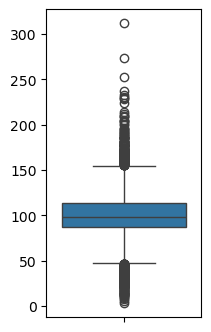

In [369]:
plt.figure(figsize=(2,4))
sns.boxplot(data=time,width = 0.8)

--> median duration time for movies is near to 100 min

--> there are upper outliers and lower outliers in the dataset attributing to short films and long sci-fi movies

**<span style="font-size: 15px;">Analysis on tv_show duration</span>**

In [370]:
# splitting digits and strings
season_split = type_dur_data_tvshow['duration'].str.split(" ")

In [371]:
# extracting digits 
season_split=list(season_split)
seasons=[]
for i in season_split:
    for j in i:
        seasons.append(int(j))
        break

In [372]:
seasons[:5]

[2, 1, 1, 2, 1]

In [373]:
print(max(seasons),min(seasons),sep=",")

17,1


--> there are TV Shows with a long as 17 seasons.

In [374]:
pd.Series(seasons).median()

1.0

In [375]:
seasons = pd.DataFrame(seasons,columns=['season']).value_counts().reset_index()

In [376]:
x_bar = seasons['season']
y_bar = seasons['count']

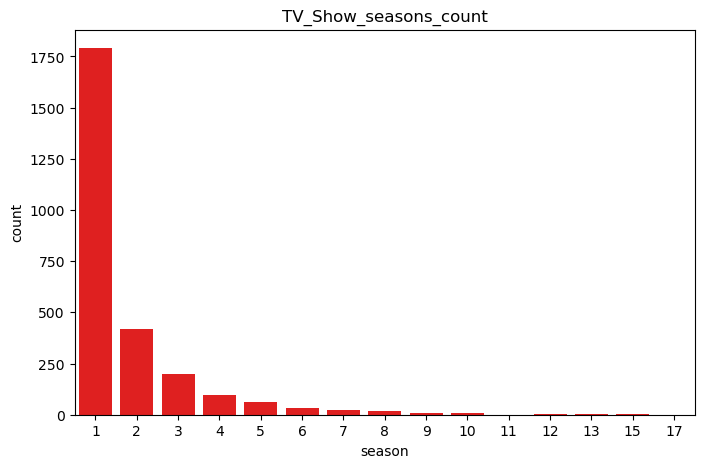

In [377]:
plt.figure(figsize=(8,5))
sns.barplot(data=seasons,x=x_bar, y=y_bar, color = 'red')
plt.title('TV_Show_seasons_count')
plt.show()

--> highly skewed towards right, majority of tv_shows belongs to single season or 2.

--> This could be due to high cost of production involved and at the same time strategy of prioritizing new content to attract subscribers.

**<span style="font-size: 15px;">Content_rating : Movie</span>**

In [273]:
content_rating_data = data[['type','content_rating']]

In [274]:
content_rating_data.head(2)

,type,content_rating
0,Movie,PG-13
1,TV Show,TV-MA


In [275]:
movie_content_rating_data = content_rating_data[content_rating_data['type']=='Movie']
tvshow_content_rating_data = content_rating_data[content_rating_data['type']=='TV Show']

In [277]:
movie_content_rating_data.value_counts()

type   content_rating
Movie  TV-MA             2062
       TV-14             1427
       R                  797
       TV-PG              540
       PG-13              490
       PG                 287
       TV-Y7              139
       TV-Y               131
       TV-G               126
       NR                  75
       G                   41
       TV-Y7-FV             5
       NC-17                3
       UR                   3
Name: count, dtype: int64

**<span style="font-size: 15px;">Content_rating : TV Show</span>**

In [278]:
tvshow_content_rating_data.value_counts()

type     content_rating
TV Show  TV-MA             1143
         TV-14              730
         TV-PG              321
         TV-Y7              194
         TV-Y               175
         TV-G                94
         NR                   4
         R                    2
         TV-Y7-FV             1
Name: count, dtype: int64

--> TV-MA - Mature Audience Only

--> TV-14 - Parents Strongly Cautioned

-->     R - Restricted

--> While an increase in mature content is a strategic move to secure market share, in a culturally and traditionally sensitive country like India, such content can cause frequent public, political, and religious backlash, leading to growing government intervention. 

**<span style="font-size: 20px;">Recommendations</span>**

**<span style="font-size: 15px;">1. Country base</span>**

As of 2021, Netflix has streamed contents in more than 120 countries. Except some major countries (in terms of GDP and Per capita Income), in rest of the countries, there is a need for revamp of strategy, especially in countries like China, African countries, Gulf countries. These countries are either far behind for some of these reasons :

1. Slow internet

2. Strong local rivals

3. Government restrictions due to sensitive contents

4. Low ARPU (Average Revenue Per User)

By partnering with local players, streaming Advertising-Based Video On Demand(AVOD)contents and bringing more regional contents that can connect with the local sentiments will help to increase the presence in already active countries and open accounts in new countries.

**<span style="font-size: 15px;">2. Directors</span>**

Top_5 directors either direct comedies or animated contents. Streaming contents appealing to Gen-Z and pooling directors who had made credible footprint in their country will help to increase the subscriber base and footprints in yet to open account countries.

**<span style="font-size: 15px;">3. Content Duration</span>**

Though most of the tvshows streamed in Netflix are of a single season or two, binge-watching is a growing culture developed especially during pandemic years, which is to be taken into account.  

**<span style="font-size: 15px;">4. Content Rating</span>**

Matured and politically sensitive contents should be strategically streamed to avoid government restrictions and people's sentiments in general. Countries like India and China are very sensitive to such contents. Streaming contents more acceptable to a wider audience along with regional flavours can bring benefits. 

**<span style="font-size: 15px;">5. Genre</span>**

International Movies, Dramas and Comedies tops the chart. Streaming contents considering into account of local seasons, Gen-z groups, family and kids can increase the subscriber base and wider acceptance of this platform. 